In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


# 1st Task

In [4]:
#Set the seed for reproducibility
np.random.seed(42)

In [5]:
#Random sample for 25 observations
random_sample = df.sample(n = 25, replace = True)

### Population statistics

In [6]:
population_mean_glucose = df['Glucose'].mean()
population_highest_glucose = df['Glucose'].max()

In [7]:
print("Mean value of population glucose: ", population_mean_glucose)
print("Highest value of population glucose: ", population_highest_glucose)

Mean value of population glucose:  120.89453125
Highest value of population glucose:  199


### Sample statistics

In [8]:
sample_mean_glucose = random_sample['Glucose'].mean()
sample_highest_glucose = random_sample['Glucose'].max()

In [9]:
print("Mean value of the sample glucose: ", sample_mean_glucose)
print("Highest value of the sample glucose: ", sample_highest_glucose)

Mean value of the sample glucose:  123.92
Highest value of the sample glucose:  199


### Visualization 

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

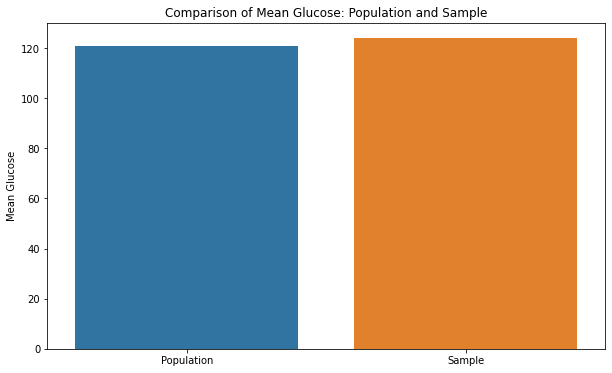

In [11]:
#Creating a bar chart for population and sample mean glucose.
plt.figure(figsize=(10, 6))
sns.barplot(x=['Population', 'Sample'], y = [population_mean_glucose, sample_mean_glucose])
plt.title('Comparison of Mean Glucose: Population and Sample')
plt.ylabel('Mean Glucose')
plt.show()

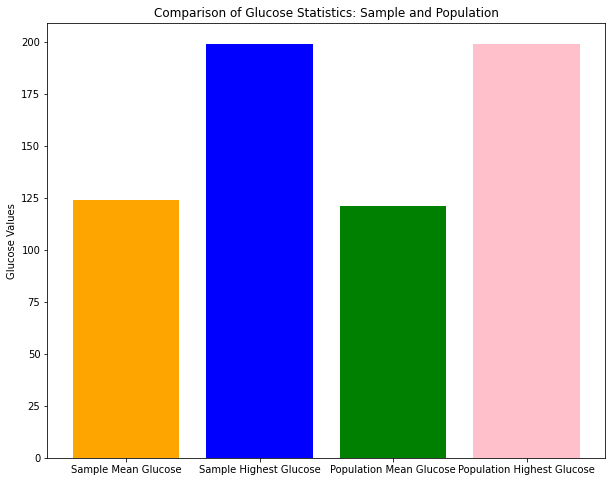

In [14]:
# Creating a bar chart for comparison
labels = ['Sample Mean Glucose', 'Sample Highest Glucose', 'Population Mean Glucose', 'Population Highest Glucose']
values = [sample_mean_glucose, sample_highest_glucose, population_mean_glucose, population_highest_glucose]

plt.figure(figsize=(10, 8))
plt.bar(labels, values, color=['orange', 'blue', 'green', 'pink'])
plt.ylabel('Glucose Values')
plt.title('Comparison of Glucose Statistics: Sample and Population')
plt.show()

# 2nd Task 

In [15]:
#Calculating the 98th percentile of BMI for population and sample.

population_percentile = np.percentile(df['BMI'], 98)
sample_percentile = np.percentile(random_sample['BMI'], 98)

#Printing the percentiles
print("Population 98th percentile BMI: ", population_percentile)
print("Sample 98th percentile BMI: ", sample_percentile)

Population 98th percentile BMI:  47.52599999999996
Sample 98th percentile BMI:  47.732


### Visualization

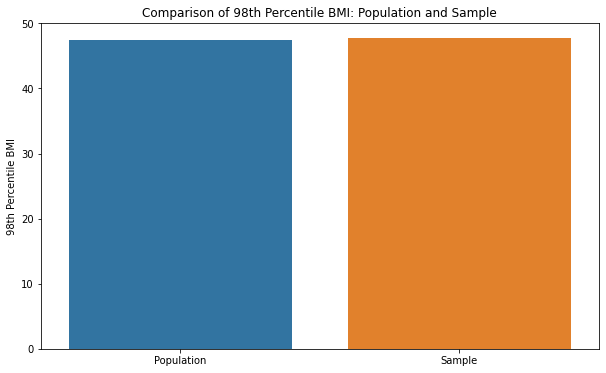

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x = ['Population', 'Sample'], y = [population_percentile, sample_percentile])
plt.title('Comparison of 98th Percentile BMI: Population and Sample')
plt.ylabel('98th Percentile BMI')
plt.show()

# 3rd Task

In [17]:
np.random.seed(42)

In [18]:
#Number of bootstrap samples and sample size

bootstrap_samples = 500
bootstrap_sample_size = 150

#Initializing the arrays to store bootstrap statistics
bootstrap_means = np.zeros(bootstrap_samples)
bootstrap_std_devs = np.zeros(bootstrap_samples)
bootstrap_percentiles = np.zeros(bootstrap_samples)

#Bootstrap sampling
for i in range(bootstrap_samples):
    bootstrap_sample = np.random.choice(df['BloodPressure'], size = bootstrap_sample_size, replace = True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
    bootstrap_std_devs[i] = np.std(bootstrap_sample)
    bootstrap_percentiles[i] = np.percentile(bootstrap_sample, 95)

In [19]:
#Population statistics

population_mean_bp = df['BloodPressure'].mean()
population_std_dev_bp = df['BloodPressure'].std()
population_percentile_bp = np.percentile(df['BloodPressure'], 95)

In [20]:
#Printing population statistics

print("Population Mean Blood pressure: ", population_mean_bp)
print("Population Standard Deviation Blood pressure: ", population_std_dev_bp)
print("Population 95th Percentile Blood pressure: ", population_percentile_bp)

Population Mean Blood pressure:  69.10546875
Population Standard Deviation Blood pressure:  19.355807170644777
Population 95th Percentile Blood pressure:  90.0


In [21]:
#Printing bootstrap statistics

print("Bootstrap mean Blood pressure (Mean of Means): ", np.mean(bootstrap_means))
print("Bootstrap Standard deviation Blood pressure (Mean of Std devs): ", np.mean(bootstrap_std_devs))
print("Bootstrap 95th Percentile Blood pressure (Mean of Percentiles): ", np.mean(bootstrap_percentiles))

Bootstrap mean Blood pressure (Mean of Means):  69.17692000000001
Bootstrap Standard deviation Blood pressure (Mean of Std devs):  19.010032376696216
Bootstrap 95th Percentile Blood pressure (Mean of Percentiles):  91.13339999999998


### Visualization

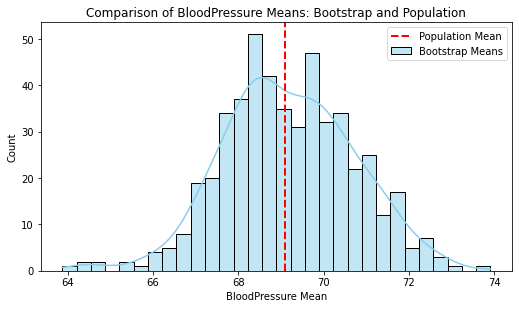

In [22]:
# Create charts for comparison
plt.figure(figsize=(14, 8))

#Comparison of means
plt.subplot(2, 2, 1)
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue', label='Bootstrap Means')
plt.axvline(population_mean_bp, color='red', linestyle='dashed', linewidth=2, label='Population Mean')
plt.title('Comparison of BloodPressure Means: Bootstrap and Population')
plt.xlabel('BloodPressure Mean')
plt.legend()
plt.tight_layout()

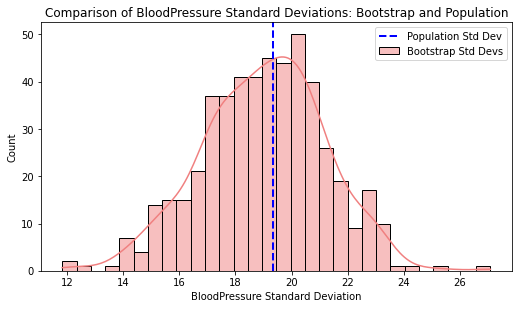

In [23]:
plt.figure(figsize=(14, 8))

# Comparison of standard deviations
plt.subplot(2, 2, 2)
sns.histplot(bootstrap_std_devs, bins=30, kde=True, color='lightcoral', label='Bootstrap Std Devs')
plt.axvline(population_std_dev_bp, color='blue', linestyle='dashed', linewidth=2, label='Population Std Dev')
plt.title('Comparison of BloodPressure Standard Deviations: Bootstrap and Population')
plt.xlabel('BloodPressure Standard Deviation')
plt.legend()
plt.tight_layout()

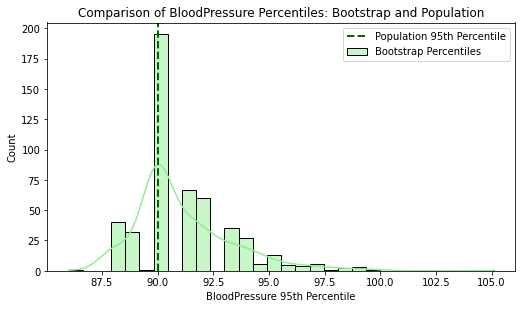

In [24]:
plt.figure(figsize=(14, 8))

# Comparison of percentiles
plt.subplot(2, 2, 3)
sns.histplot(bootstrap_percentiles, bins=30, kde=True, color='lightgreen', label='Bootstrap Percentiles')
plt.axvline(population_percentile_bp, color='darkgreen', linestyle='dashed', linewidth=2, label='Population 95th Percentile')
plt.title('Comparison of BloodPressure Percentiles: Bootstrap and Population')
plt.xlabel('BloodPressure 95th Percentile')
plt.legend()
plt.tight_layout()

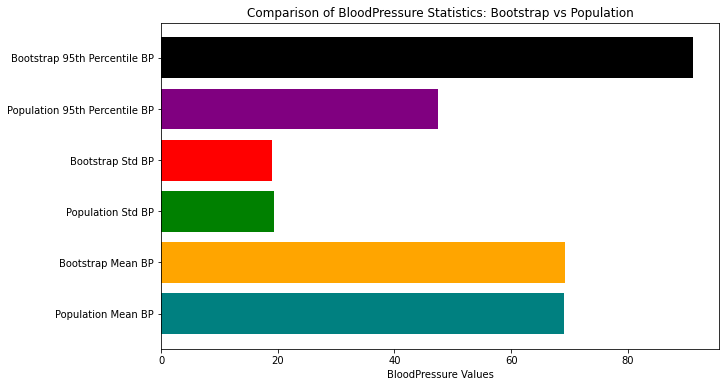

In [34]:
#Comparing mean, SD, and percentile
labels = ['Population Mean BP', 'Bootstrap Mean BP', 'Population Std BP', 'Bootstrap Std BP',
          'Population 95th Percentile BP', 'Bootstrap 95th Percentile BP']
values = [population_mean_bp, np.mean(bootstrap_means), population_std_dev_bp, np.mean(bootstrap_std_devs),
          population_percentile, np.mean(bootstrap_percentiles)]

plt.figure(figsize=(10, 6))
plt.barh(labels, values, color=['teal', 'orange', 'green', 'red', 'purple', 'black'])
plt.xlabel('BloodPressure Values')
plt.title('Comparison of BloodPressure Statistics: Bootstrap vs Population')
plt.show()